In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)

# Build DataFrames / Numpy Arrays

In [21]:
db = pd.read_csv("../data/clean.csv")
db.describe()

,AQ1,AQ2,AQ3,AQ4,AOT1,AOT2,AT,HQ1,HQ2,HQ3,HQ4,HOT1,HOT2,HT
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,28.459356,28.473926,28.490031,26.944018,0.661043,0.064417,113.092791,29.378067,29.006135,29.160276,27.427914,0.693252,0.080521,115.746166
std,5.946541,5.849685,5.761296,5.934725,2.766450,0.773996,12.011435,5.878967,5.924438,5.999073,5.782926,2.821812,0.964666,11.945803
min,9.000000,11.000000,10.000000,10.000000,0.000000,0.000000,79.000000,12.000000,11.000000,10.000000,10.000000,0.000000,0.000000,80.000000
25%,25.000000,25.000000,24.000000,23.000000,0.000000,0.000000,105.000000,25.000000,25.000000,25.000000,23.750000,0.000000,0.000000,108.000000
50%,28.000000,28.000000,28.000000,27.000000,0.000000,0.000000,113.000000,29.000000,29.000000,29.000000,28.000000,0.000000,0.000000,116.000000
75%,32.000000,33.000000,33.000000,31.000000,0.000000,0.000000,121.000000,33.000000,33.000000,33.000000,31.000000,0.000000,0.000000,124.000000
max,55.000000,47.000000,51.000000,48.000000,20.000000,12.000000,176.000000,50.000000,50.000000,51.000000,49.000000,20.000000,16.000000,175.000000


In [22]:
np_array = db.to_numpy()
np_array

array([[ 29,  34,  25, ...,   0,   0, 126],
       [ 22,  30,  19, ...,   0,   0, 123],
       [ 28,  27,  28, ...,   0,   0, 113],
       ...,
       [ 31,  19,  21, ...,   0,   0,  96],
       [ 26,  20,  31, ...,   0,   0, 122],
       [ 29,  23,  10, ...,   0,   0, 112]], dtype=int64)

In [23]:
db_team = pd.read_csv("../data/teams.csv")
db_team.head()

,Away,Home
0,Philadelphia 76ers,Boston Celtics
1,Los Angeles Lakers,Golden State Warriors
2,Orlando Magic,Detroit Pistons
3,Washington Wizards,Indiana Pacers
4,Houston Rockets,Atlanta Hawks


In [24]:
np_team = db_team.to_numpy()
np_team

array([['Philadelphia 76ers', 'Boston Celtics'],
       ['Los Angeles Lakers', 'Golden State Warriors'],
       ['Orlando Magic', 'Detroit Pistons'],
       ...,
       ['New York Knicks', 'Miami Heat'],
       ['Golden State Warriors', 'Los Angeles Lakers'],
       ['Philadelphia 76ers', 'Boston Celtics']], dtype=object)

# Making Dictionary of Totals

In [31]:
#build dict
d_teams_totals = {}
d_teams_totals["Home"] = {}
d_teams_totals["Away"] = {}
for idx, sample in enumerate(np_array):
    try:
        d_teams_totals["Away"][np_team[idx][0]].append(sample[6])
    except:
        d_teams_totals["Away"][np_team[idx][0]] = [sample[6]]
    try:
        d_teams_totals["Home"][np_team[idx][1]].append(sample[-1])
    except:
        d_teams_totals["Home"][np_team[idx][1]] = [sample[-1]]
    
d_teams_totals["Home"]["Charlotte Hornets"][0]

112

## Hornets Figure

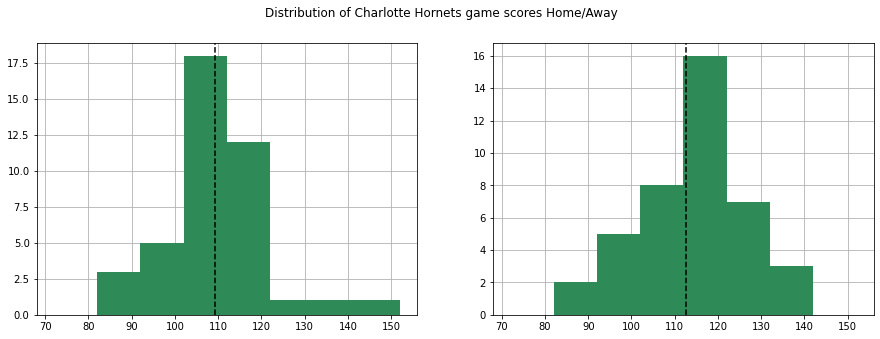

In [42]:
hornets_h = d_teams_totals["Home"]["Charlotte Hornets"]
hornets_a = d_teams_totals["Away"]["Charlotte Hornets"]

bins_t = [x for x in range(min(hornets_h) - 10, max(hornets_h) + 9, 10)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(hornets_h, bins=bins_t, color=['seagreen'])
ax2.hist(hornets_a, bins=bins_t, color=['seagreen'])
ax1.axvline(np.array(hornets_h).mean(), color='k', linestyle='dashed')
ax2.axvline(np.array(hornets_a).mean(), color='k', linestyle='dashed')
fig.suptitle("Distribution of Charlotte Hornets game scores Home / Away")
ax1.grid()
ax2.grid()

In [47]:
basic_dict = {}
for idx, sample in enumerate(d_teams_totals["Home"]):
    basic_dict[sample] = d_teams_totals["Home"][sample]
    basic_dict[sample].extend(d_teams_totals["Away"][sample])

In [78]:
min_t = 'Charlotte Hornets'
max_t = 'Charlotte Hornets'

means = {}

for sample in basic_dict:
    means[sample] = float(np.array(basic_dict[sample]).mean())
    print(sample + ": " + str(means[sample]))
    
for sample in means:
    if means[max_t] < means[sample]:
        max_t = sample
    if means[min_t] > means[sample]:
        min_t = sample

print()
print("Max: " + max_t)
print("Min: " + min_t)

Boston Celtics: 116.94366197183099
Golden State Warriors: 117.75524475524476
Detroit Pistons: 109.63414634146342
Indiana Pacers: 115.39837398373983
Atlanta Hawks: 117.67164179104478
Brooklyn Nets: 112.48837209302326
Memphis Grizzlies: 115.06060606060606
Miami Heat: 109.3943661971831
Toronto Raptors: 112.29032258064517
Minnesota Timberwolves: 114.83582089552239
San Antonio Spurs: 112.35772357723577
Utah Jazz: 116.78048780487805
Phoenix Suns: 113.33093525179856
Sacramento Kings: 119.35338345864662
Philadelphia 76ers: 113.92142857142858
Los Angeles Lakers: 116.32394366197182
Charlotte Hornets: 111.52032520325203
Washington Wizards: 112.79674796747967
New York Knicks: 113.55
Houston Rockets: 110.73983739837398
Portland Trail Blazers: 112.66666666666667
Orlando Magic: 110.44715447154472
Chicago Bulls: 112.40944881889764
Milwaukee Bucks: 116.25384615384615
Dallas Mavericks: 113.83739837398375
Denver Nuggets: 114.82014388489209
Cleveland Cavaliers: 110.86923076923077
New Orleans Pelicans: 114

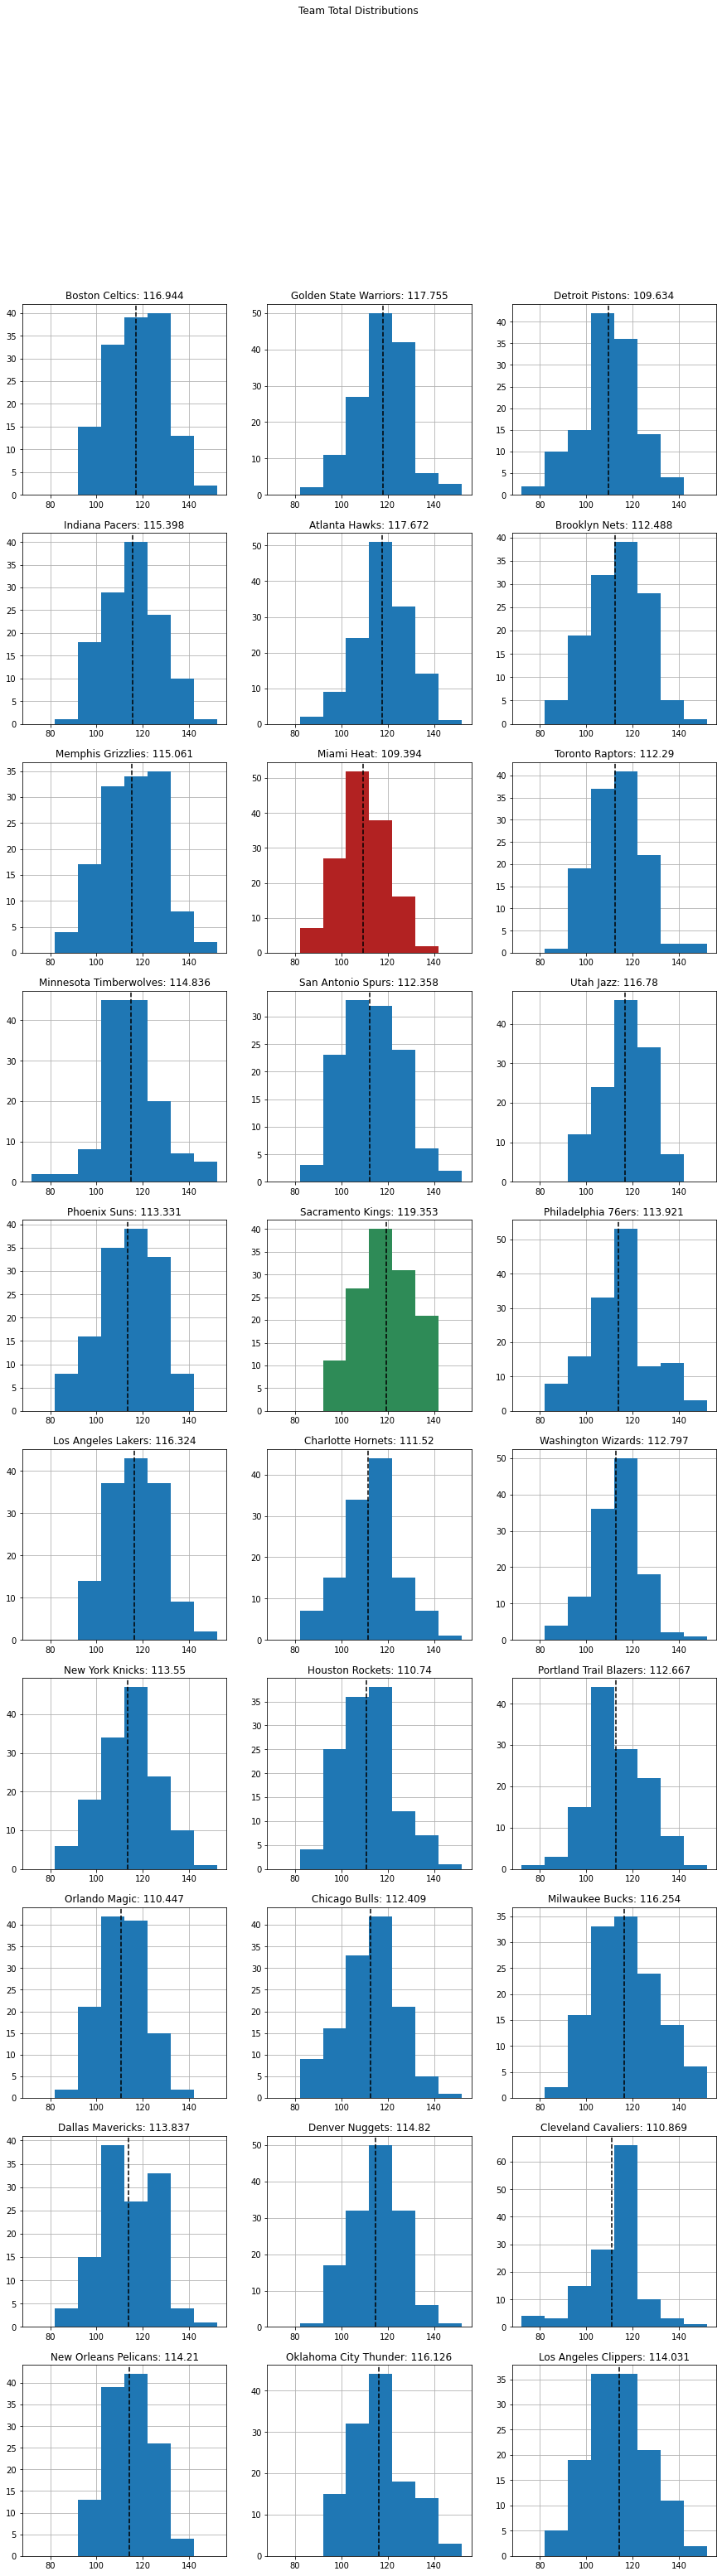

In [82]:
fig, axs = plt.subplots(10, 3, figsize = (15, 50))

axs = axs.ravel()
fig.patch.set_facecolor("white")

for idx, sample in enumerate(basic_dict):
    if sample == max_t:
        axs[idx].hist(basic_dict[sample], bins = bins_t, color='seagreen')
    elif sample == min_t:
        axs[idx].hist(basic_dict[sample], bins = bins_t, color='firebrick')
    else:
        axs[idx].hist(basic_dict[sample], bins = bins_t)
    axs[idx].axvline(np.array(basic_dict[sample]).mean(), color='k', linestyle='dashed')
    axs[idx].set_title(sample + ": " + str(round(means[sample], 3)))
    axs[idx].grid()